# Case Study - Car Price Prediction

This data is a **regression problem**, trying to predict car price.

The followings describe the features.

- **name**: Detail description of car's brand & model
- **year**: Release year of the car's model
- **selling_price**: Car's selling price
- **km_driven**: How much distance (in kilometres) the car had travelled.
- **fuel**: Fuel type in 'Diesel','Petrol','CNG' and 'LPG'
- **seller_type**: Seller types in 'Individual', 'Dealer' and 'Trustmark Dealer'
- **transmission**: Car's gearbox types in 'Manual' and 'Automatic'
- **owner**: Car's owner type in 'First Owner', 'Second Owner', 'Third Owner','Fourth & Above Owner' and 'Test Drive Car'
- **mileage**: How many miles the vehicle runs per liter of fuel
- **engine**: Engine power of the car
- **max_power**: The maximum power available of the car
- **torque**: The measurement of car's ability
- **seats**: No of seats of each car

## Importing libraries

In [65]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [66]:
import matplotlib
np.__version__, pd.__version__, sns.__version__, matplotlib.__version__

('1.24.4', '2.0.3', '0.12.2', '3.7.2')

## 1. Load data

In [67]:
df = pd.read_csv('/root/source_code/raw_data/Cars.csv')

In [68]:
# print the first rows of data
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [69]:
# print the shape of data
df.shape

(8128, 13)

In [70]:
# Statistical info Hint: look up .describe()
df.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [71]:
# Check Dtypes of input data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


## 2. Exploratory Data Analysis

EDA is an essential step to inspect the data, so to better understand nature of the given data.

### Renaming

Now we would like to rename 'name' column into brand.

In [72]:
# Check the column names
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

In [73]:
df.rename(columns = {'name':'brand'}, inplace = True)

In [74]:
# Check the column names again
df.columns

Index(['brand', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

In [75]:
# Get the car brand only from name

df['brand'] = df['brand'].str.split(' ', expand=True)[0]

Remove all rows with CNG and LPG fuel type because CNG and LPG use a different mileage system.

In [76]:
# Check records count in 'fuel'
df.fuel.value_counts()

fuel
Diesel    4402
Petrol    3631
CNG         57
LPG         38
Name: count, dtype: int64

In [77]:
# Remove 'CNG' and 'LPG' record count from data set
exc_fuel = df[ (df['fuel'] == 'CNG') | (df['fuel'] == 'LPG') ].index
df.drop(exc_fuel , inplace=True)

In [78]:
# Check again fuel records count to make sure there is no record related to 'CNG' or 'LPG'
df.fuel.value_counts()

fuel
Diesel    4402
Petrol    3631
Name: count, dtype: int64

In [79]:
# Remove mileage unit of 'kmpl' to get mileage number only
df['mileage'] = df['mileage'].str.split(' ', expand=True)[0].astype(float)

In [80]:
# Remove engine unit of 'CC' to get number value only

df['engine'] = df['engine'].str.split(' ', expand=True)[0].astype(float)

In [81]:
# Remove max_power unit to get number value only
var_value = df['max_power'].str.split(' ', expand=True)[0]
var_value_2 = [None if isinstance(value, str) and value.isalpha() else float(value) for value in var_value]
df['max_power'] = var_value_2

In [82]:
# Drop 'Torque' feature as not clearly understanding of the value
df = df.drop('torque', axis=1)

In [83]:
# Check records count in 'Owner'
df.owner.value_counts()

# exc_fuel = df[ (df['fuel'] == 'CNG') | (df['fuel'] == 'LPG') ].index

owner
First Owner             5238
Second Owner            2073
Third Owner              547
Fourth & Above Owner     170
Test Drive Car             5
Name: count, dtype: int64

In [84]:
df.selling_price.mean(),df.selling_price.max(),df.selling_price.min()

(642736.1205029255, 10000000, 29999)

In [85]:
var_testcar = df['owner'] == 'Test Drive Car'
df[var_testcar].selling_price.count(),df[var_testcar].selling_price.mean(),df[var_testcar].selling_price.max(),df[var_testcar].selling_price.min()

(5, 4403800.0, 6523000, 1350000)

In [86]:
var_notestcar = df['owner'] != 'Test Drive Car'
df[var_notestcar].selling_price.count(),df[var_notestcar].selling_price.mean(),df[var_notestcar].selling_price.max(),df[var_notestcar].selling_price.min()

(8028, 640393.6542102641, 10000000, 29999)

In [87]:
# Remove 'Test Drive Car'
exc_owner = df[df['owner'] == 'Test Drive Car'].index
df.drop(exc_owner , inplace=True)

In [88]:
# Check again owner records count to make sure there is no record related to 'Test Drive Car'
df.owner.value_counts()

owner
First Owner             5238
Second Owner            2073
Third Owner              547
Fourth & Above Owner     170
Name: count, dtype: int64

In [89]:
df.seller_type.value_counts()

seller_type
Individual          6673
Dealer              1119
Trustmark Dealer     236
Name: count, dtype: int64

In [90]:
df.transmission.value_counts()

transmission
Manual       6982
Automatic    1046
Name: count, dtype: int64

#### Feature driven of 'car_age' from 'year'

In [91]:
from datetime import datetime
df['car_age'] = (datetime.now().year) - df['year']

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8028 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   brand          8028 non-null   object 
 1   year           8028 non-null   int64  
 2   selling_price  8028 non-null   int64  
 3   km_driven      8028 non-null   int64  
 4   fuel           8028 non-null   object 
 5   seller_type    8028 non-null   object 
 6   transmission   8028 non-null   object 
 7   owner          8028 non-null   object 
 8   mileage        7814 non-null   float64
 9   engine         7814 non-null   float64
 10  max_power      7820 non-null   float64
 11  seats          7814 non-null   float64
 12  car_age        8028 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 878.1+ KB


In [93]:
df.head()

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,car_age
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,9
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,9
2,Honda,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0,17
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0,13
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0,16


In [94]:
# Statistical info Hint: look up .describe()
df.describe()

,year,selling_price,km_driven,mileage,engine,max_power,seats,car_age
count,8028.000000,8.028000e+03,8.028000e+03,7814.000000,7814.000000,7820.000000,7814.000000,8028.000000
mean,2013.815521,6.403937e+05,6.977314e+04,19.391962,1462.914640,91.819726,5.421551,9.184479
std,4.030836,8.027015e+05,5.664419e+04,4.001972,504.759742,35.804513,0.963125,4.030836
min,1983.000000,2.999900e+04,1.000000e+03,0.000000,624.000000,0.000000,2.000000,3.000000
25%,2011.000000,2.600000e+05,3.500000e+04,16.780000,1197.000000,68.850000,5.000000,6.000000
50%,2015.000000,4.500000e+05,6.000000e+04,19.300000,1248.000000,82.400000,5.000000,8.000000
75%,2017.000000,6.800000e+05,9.800000e+04,22.320000,1582.000000,102.000000,5.000000,12.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,400.000000,14.000000,40.000000


<Axes: xlabel='fuel', ylabel='count'>

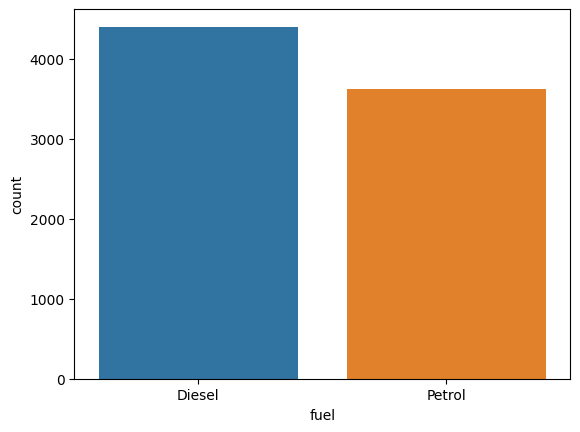

In [95]:
sns.countplot(data = df, x = 'fuel')

<Axes: xlabel='seller_type', ylabel='count'>

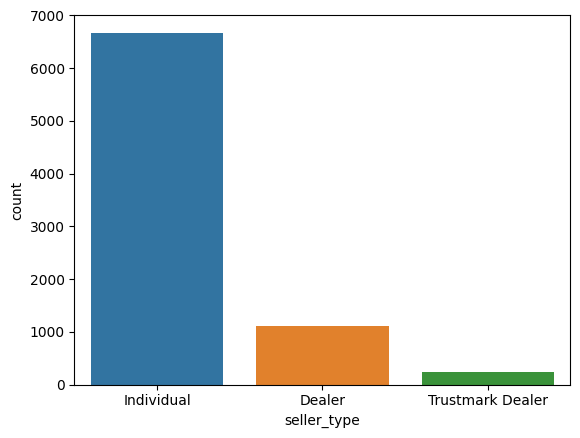

In [96]:
sns.countplot(data = df, x = 'seller_type')

<Axes: xlabel='transmission', ylabel='count'>

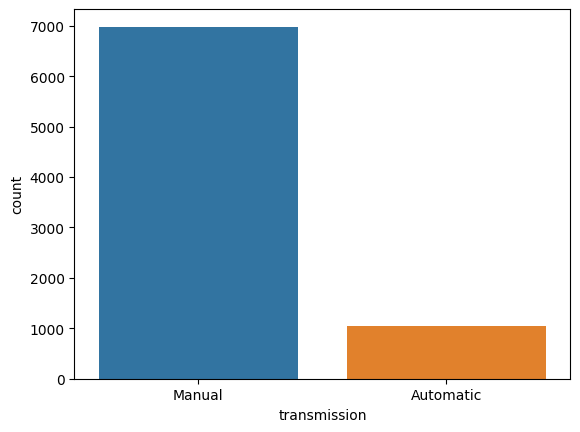

In [97]:
sns.countplot(data = df, x = 'transmission')

<Axes: xlabel='owner', ylabel='count'>

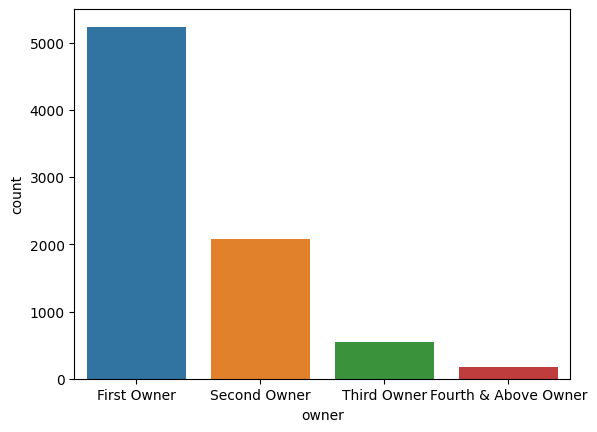

In [98]:
sns.countplot(data = df, x = 'owner')

<Axes: xlabel='seats', ylabel='count'>

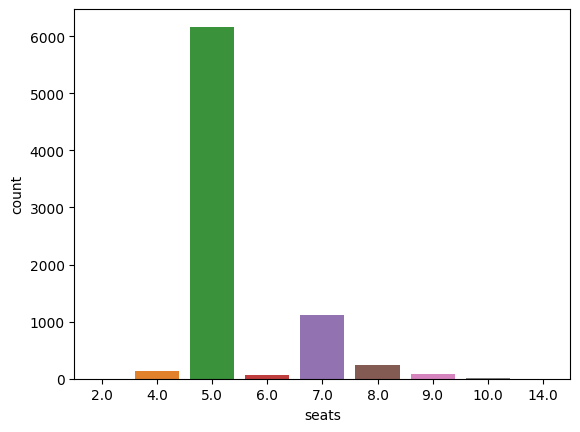

In [99]:
sns.countplot(data = df, x = 'seats')

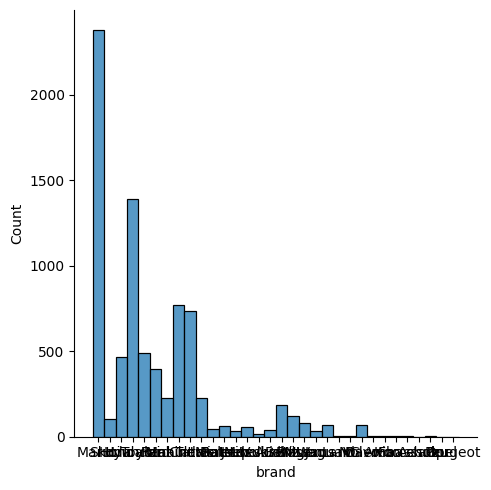

In [100]:
sns.displot(data = df, x = 'brand')

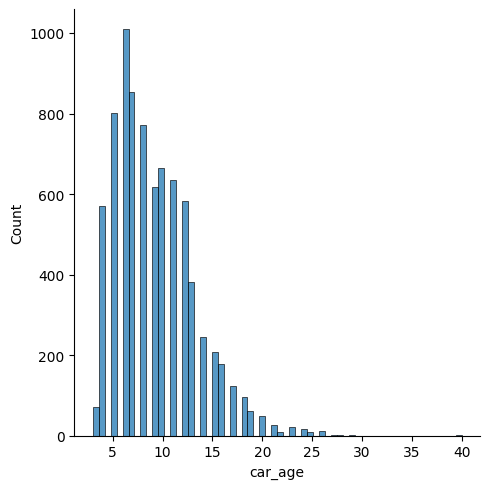

In [101]:
sns.displot(data = df, x = 'car_age')

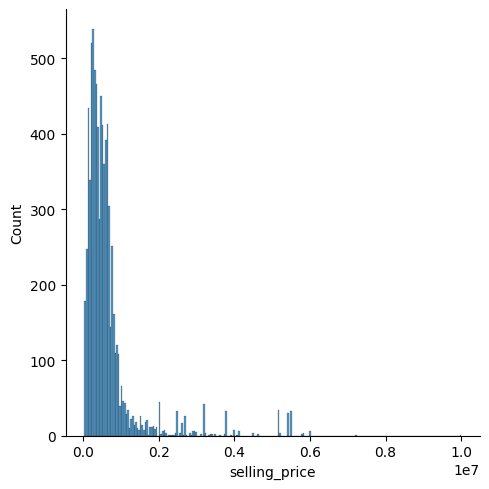

In [102]:
sns.displot(data = df, x = 'selling_price')

Text(0, 0.5, 'Selling Price')

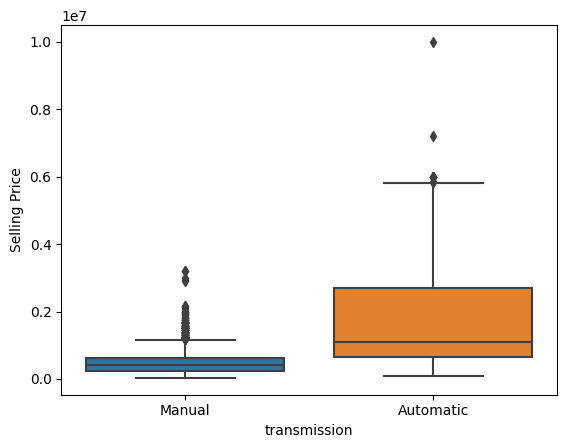

In [103]:
# Let's try bar plot on ""
sns.boxplot(x = df["transmission"], y = df["selling_price"]);
plt.xlabel("transmission")
plt.ylabel("Selling Price")

In [104]:
# Let's try bar plot on ""
sns.boxplot(x = df["fuel"], y = df["selling_price"]);
plt.xlabel("fuel")
plt.ylabel("Selling Price")

Text(0, 0.5, 'Selling Price')

In [ ]:
# Let's try bar plot on "owner"
sns.boxplot(x = df["owner"], y = df["selling_price"]);
plt.xlabel("Owner")
plt.ylabel("Selling Price")

In [ ]:
sns.scatterplot(x = df['car_age'], y = df['selling_price'], hue=df['fuel'])

In [ ]:
sns.scatterplot(x = df['car_age'], y = df['selling_price'], hue=df['transmission'])

In [ ]:
sns.scatterplot(x = df['km_driven'], y = df['selling_price'], hue=df['transmission'])

In [ ]:
sns.scatterplot(x = df['mileage'], y = df['selling_price'], hue=df['transmission'])

In [ ]:
sns.scatterplot(x = df['max_power'], y = df['selling_price'], hue=df['transmission'])

In [ ]:
sns.scatterplot(x = df['max_power'], y = df['selling_price'], hue=df['car_age'])

In [ ]:
sns.scatterplot(x = df['max_power'], y = df['selling_price'], hue=df['transmission'])

In [ ]:
sns.scatterplot(x = df['brand'], y = df['selling_price'], hue=df['transmission'])

In [ ]:
df.head()

In [ ]:
plt.figure(figsize = (15,8))
my_df = df.select_dtypes(exclude = [object])
sns.heatmap(my_df.corr(),annot=True,cmap="coolwarm")

In [ ]:
import ppscore as pps

In [ ]:
# Check features correlation with ppscore

# import ppscore as pps

#this needs some minor preprocessing because seaborn.heatmap unfortunately does not accept tidy data
matrix_df = pps.matrix(df)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')

#plot
plt.figure(figsize = (15,8))
sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)

#### Label encoding for features

In [ ]:
df.owner.value_counts()

In [ ]:
# Label encoding for 'owner'
df['owner'] = df['owner'].map({'First Owner':1,'Second Owner':2,'Third Owner':3,'Fourth & Above Owner':4,'Test Drive Car':5})

In [ ]:
# Check label encoding value for 'owner'
df.owner.value_counts()

In [ ]:
# Label encoding for 'Transmission' by adding additional column
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["transmission_code"] = le.fit_transform(df["transmission"])

df["transmission_code"].unique()

In [ ]:
# Check label encode mapping
le.classes_

In [ ]:
# Label encoding for 'Fuel' by adding additional column
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["fuel_code"] = le.fit_transform(df["fuel"])

df["fuel_code"].unique()

In [ ]:
# Check label encode mapping
le.classes_

In [ ]:
# Check data set values after label encoding
df.head()

In [ ]:
# Check with heatmap again including label encoded columns
plt.figure(figsize = (15,8))
my_df = df.select_dtypes(exclude = [object])
sns.heatmap(my_df.corr(),annot=True,cmap="coolwarm")

#sns.heatmap(df.corr(), annot=True, cmap="coolwarm")  #don't forget these are not all variables! categorical is not here...

In [ ]:
# Check feture correlation again including label encoded features
import ppscore as pps

#this needs some minor preprocessing because seaborn.heatmap unfortunately does not accept tidy data
matrix_df = pps.matrix(df)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')

#plot
plt.figure(figsize = (15,8))
sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)

#### Log transform for features with big number

In [ ]:
# Check original value before log transform
df.head()

In [ ]:
# Log transform
df['selling_price'] = np.log(df['selling_price'])
df['km_driven'] = np.log(df['km_driven'])
df['engine'] = np.log(df['engine'])

In [ ]:
# Check after log transform
df.head()


## 4. Feature selection

In [ ]:
# choosen features
# transmission,km_driven,fuel
# max_power,car_age,mileage

#x is our strong features
X = df[        ['max_power', 'car_age', 'mileage']        ]

#y is simply the life expectancy col
y = df['selling_price']

In [ ]:
print(X.shape) #2d (no of samples, no of features)
print(y.shape) #1d (no of samples)

### Train test split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 72)

In [ ]:
print(X_train.shape) #2d (no of samples, no of features)
print(X_test.shape) #2d (no of samples, no of features)
print(y_train.shape) #1d (no of samples)
print(y_test.shape) #1d (no of samples)

## 5. Preprocessing

### Null values checking

In [ ]:
#check for null values
X_train[['max_power', 'car_age', 'mileage']].isna().sum()

In [ ]:
X_test[['max_power', 'car_age', 'mileage']].isna().sum()

In [ ]:
y_train.isna().sum()

In [ ]:
y_test.isna().sum()

In [ ]:
sns.displot(data=df, x='max_power')

In [ ]:
# Fill the max_power null values with median because data seem left screw.
df['max_power'].mean(), df['max_power'].median()

In [ ]:
#let's fill the training set first!
X_train['max_power'].fillna(X_train['max_power'].median(), inplace=True)

In [ ]:
#let's fill the testing set with the training distribution first!
X_test['max_power'].fillna(X_train['max_power'].median(), inplace=True)

In [ ]:
sns.displot(data=df, x='mileage')

In [ ]:
df['mileage'].mean(), df['mileage'].median()

In [ ]:
#let's fill the training set first!
X_train['mileage'].fillna(X_train['mileage'].mean(), inplace=True)

In [ ]:
#let's fill the testing set with the training distribution first!
X_test['mileage'].fillna(X_train['mileage'].mean(), inplace=True)

In [ ]:
#check again
X_train[['max_power', 'car_age', 'mileage']].isna().sum()

In [ ]:
X_test[['max_power', 'car_age', 'mileage']].isna().sum()

In [ ]:
y_train.isna().sum(), y_test.isna().sum()

### Checking Outliers

In [ ]:
# Create a dictionary of columns.
col_dict = {'max_power':1,'car_age':2,'mileage':3}

# Detect outliers in each variable using box plots.
plt.figure(figsize=(20,30))

for variable,i in col_dict.items():
                     plt.subplot(5,4,i)
                     plt.boxplot(X_train[variable])
                     plt.title(variable)

plt.show()

In [ ]:
def outlier_count(col, data = X_train):

    # calculate your 25% quatile and 75% quatile
    q75, q25 = np.percentile(data[col], [75, 25])

    # calculate your inter quatile
    iqr = q75 - q25

    # min_val and max_val
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)

    # count number of outliers, which are the data that are less than min_val or more than max_val calculated above
    outlier_count = len(np.where((data[col] > max_val) | (data[col] < min_val))[0])

    # calculate the percentage of the outliers
    outlier_percent = round(outlier_count/len(data[col])*100, 2)

    if(outlier_count > 0):
        print("\n"+15*'-' + col + 15*'-'+"\n")
        print('Number of outliers: {}'.format(outlier_count))
        print('Percent of data that is outlier: {}%'.format(outlier_percent))

In [ ]:
for col in X_train.columns:
    outlier_count(col)

### Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

# feature scaling helps improve reach convergence faster
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

In [ ]:
# Let's check shapes of all X_train, X_test, y_train, y_test
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)

## 6. Modeling

In [ ]:
from sklearn.linear_model import LinearRegression  #we are using regression models
from sklearn.metrics import mean_squared_error, r2_score

lr = LinearRegression()
lr.fit(X_train, y_train)
yhat = lr.predict(X_test)

print("MSE: ", mean_squared_error(y_test, yhat))
print("r2: ", r2_score(y_test, yhat))

### Cross validation + Grid search

In [ ]:
from sklearn.linear_model import LinearRegression  #we are using regression models
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Libraries for model evaluation

# models that we will be using, put them in a list
algorithms = [LinearRegression(), SVR(), KNeighborsRegressor(), DecisionTreeRegressor(random_state = 0),
              RandomForestRegressor(n_estimators = 100, random_state = 0)]

# The names of the models
algorithm_names = ["Linear Regression", "SVR", "KNeighbors Regressor", "Decision-Tree Regressor", "Random-Forest Regressor"]

Let's do some simple cross-validation here....

In [ ]:
y_train.isna().sum()

In [ ]:
from sklearn.model_selection import KFold, cross_val_score

#lists for keeping mse
train_mse = []
test_mse = []

#defining splits
kfold = KFold(n_splits=5, shuffle=True)

for i, model in enumerate(algorithms):
    scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    print(f"{algorithm_names[i]} - Score: {scores}; Mean: {scores.mean()}")

Random forest is doing better than other models.

### Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'bootstrap': [True], 'max_depth': [5, 10, None],
              'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]}

rf = RandomForestRegressor(random_state = 1)

grid = GridSearchCV(estimator = rf,
                    param_grid = param_grid,
                    cv = kfold,
                    n_jobs = -1,
                    return_train_score=True,
                    refit=True,
                    scoring='neg_mean_squared_error')

# Fit your grid_search
grid.fit(X_train, y_train);  #fit means start looping all the possible parameters

In [ ]:
grid.best_params_

In [ ]:
# Find your grid_search's best score
best_mse = grid.best_score_

In [ ]:
best_mse  # ignore the minus because it's neg_mean_squared_error

In [ ]:
# stop here

## 7. Testing

Of course, once we do everything.  We can try to shoot with the final test set.  We should no longer do anything like improving the model.  It's illegal!  since X_test is the final final test set.

In [ ]:
yhat = grid.predict(X_test)
mean_squared_error(y_test, yhat)

## 8. Analysis:  Feature Importance

Understanding why is **key** to every business, not how low MSE we got.  Extracting which feature is important for prediction can help us interpret the results.  There are several ways: algorithm, permutation, and shap.  Note that these techniques can be mostly applied to most algorithms.

Most of the time, we just apply all, and check the consistency.

#### Algorithm way

Some ML algorithms provide feature importance score after you fit the model

In [ ]:
#stored in this variable
#note that grid here is random forest
rf = grid.best_estimator_

rf.feature_importances_

In [ ]:
#let's plot
plt.barh(X.columns, rf.feature_importances_)

In [ ]:
#hmm...let's sort first
sorted_idx = rf.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

#### Permutation way

This method will randomly shuffle each feature and compute the change in the model’s performance. The features which impact the performance the most are the most important one.

*Note*: The permutation based importance is computationally expensive. The permutation based method can have problem with highly-correlated features, it can report them as unimportant.

In [ ]:
from sklearn.inspection import permutation_importance

perm_importance = permutation_importance(rf, X_test, y_test)

#let's plot
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(X.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

In [ ]:
Stop here

#### Shap way

The SHAP interpretation can be used (it is model-agnostic) to compute the feature importances. It is using the Shapley values from game theory to estimate the how does each feature contribute to the prediction. It can be easily installed (<code>pip install shap</code>)

In [ ]:
import shap

explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)

In [ ]:
#shap provides plot
shap.summary_plot(shap_values, X_test, plot_type="bar", feature_names = X.columns)

## 9. Inference

To provide inference service or deploy, it's best to save the model for latter use.

In [ ]:
import pickle

# save the model to disk
filename = 'model/car_price_prediction.model'
pickle.dump(grid, open(filename, 'wb'))

In [ ]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))

In [ ]:
#let's try to create one silly example
df[['income', 'school', 'adult-mort', 'life-exp']].loc[1]

In [ ]:
#['income', 'school', 'adult-mort']
sample = np.array([[0.476, 10.000, 271.000]])

In [ ]:
predicted_life_exp = loaded_model.predict(sample)
predicted_life_exp